### Importing dataset from Roboflow

Contains images of license plate along with the character object detections

In [10]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Cy4a2I0GCjuGakbkjIrQ")
project = rf.workspace("college-fyp-ewmvi").project("final-fyp-dataset")
version = project.version(1)
dataset = version.download("yolov9")


loading Roboflow workspace...
loading Roboflow project...


Model = license_detector

In [11]:
license_detector = project.version(1).model

Changing the confidence of the model along with the overlap

In [12]:
license_detector.confidence = 40
license_detector.overlap = 25

Testing the prediction on an image

In [13]:
prediction = license_detector.predict("predict.jpg")

Plotting the prediction in an interactive environment

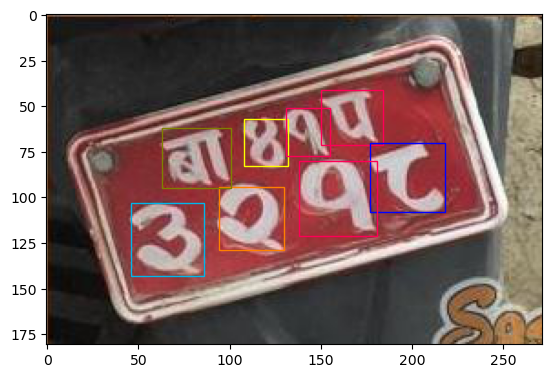

In [14]:
prediction.plot()

In [21]:
json_data = prediction.json()
print(json_data)

{'predictions': [{'x': 66.0, 'y': 123.0, 'width': 40.0, 'height': 40.0, 'confidence': 0.9550176858901978, 'class': '3', 'class_id': 3, 'detection_id': '1b8f556d-4b43-42c8-aecd-6e55e502a8d8', 'image_path': 'predict.jpg', 'prediction_type': 'ObjectDetectionModel'}, {'x': 112.0, 'y': 111.5, 'width': 36.0, 'height': 35.0, 'confidence': 0.9522336721420288, 'class': '2', 'class_id': 2, 'detection_id': '625261a2-304b-48fc-91d3-4c471ce92a79', 'image_path': 'predict.jpg', 'prediction_type': 'ObjectDetectionModel'}, {'x': 82.0, 'y': 78.5, 'width': 38.0, 'height': 33.0, 'confidence': 0.9438292384147644, 'class': 'ba', 'class_id': 10, 'detection_id': '1671a078-a326-4b5f-a3b2-ed0c4981c0a0', 'image_path': 'predict.jpg', 'prediction_type': 'ObjectDetectionModel'}, {'x': 167.0, 'y': 56.0, 'width': 34.0, 'height': 30.0, 'confidence': 0.9432401061058044, 'class': 'pa', 'class_id': 25, 'detection_id': 'db7ba228-2e31-4ef3-9621-afe255b8882c', 'image_path': 'predict.jpg', 'prediction_type': 'ObjectDetection

In [28]:
def concatenate_classes(json_data):
    predictions = json_data['predictions']
    # We have the sort the predictions by y and then x to get the characters in the correct order
    sorted_predictions = sorted(predictions, key=lambda x: (x['y'], x['x']))
    classes = [prediction['class'] for prediction in sorted_predictions]
    
    # Separate the characters into two groups: top and bottom so that the user can read efficiently
    top_characters = classes[:4][::-1]
    bottom_characters = classes[4:][::-1]
    
    # Concatenate the characters in the desired order
    concatenated_classes = ', '.join(top_characters) + '\n' + ', '.join(bottom_characters)
    return concatenated_classes 

print(concatenate_classes(json_data))

ba, 4, 1, pa
3, 2, 1, 8


Printing out all the classes that could be contained in an image

In [36]:
# Printing out the classes

project_classes = project.classes
for values in project_classes:
    print(values)


0
1
2
3
4
5
6
7
8
9
lu
ka
bagmati
me
ga
cha
gha
jha
ko
kha
madesh
ra
pa
na
ja
pradesh
ba
license-plate
